# Task 0a - Quality Control
This notebook does quality control on the adata. This is the first step.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
from os import listdir
from os.path import isfile, join

In [2]:
# Set up data loading

####################

# GA_filtered_feature_bc_matrix.h5ad
# GA_filtered_feature_bc_matrix_symbols.h5ad
# raw_feature_bc_matrix.h5ad
# raw_feature_bc_matrix_symbols.h5ad

####################

path1_matrix = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/9591-3D-SI-GA/9591-3D-SI-GA_filtered_feature_bc_matrix.h5ad'
path2_matrix = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/9591-2D-SI-GA/9591-2D-SI-GA_filtered_feature_bc_matrix.h5ad'
path3_matrix = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/16992-3D-SI-GA/16992-3D-SI-GA_filtered_feature_bc_matrix.h5ad'
path4_matrix = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/16992-2D-SI-GA/16992-2D-SI-GA_filtered_feature_bc_matrix.h5ad'

path1_symbols = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/9591-3D-SI-GA/9591-3D-SI-GA_filtered_feature_bc_matrix_symbols.h5ad'
path2_symbols = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/9591-2D-SI-GA/9591-2D-SI-GA_filtered_feature_bc_matrix_symbols.h5ad'
path3_symbols = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/16992-3D-SI-GA/16992-3D-SI-GA_filtered_feature_bc_matrix_symbols.h5ad'
path4_symbols = '/storage/groups/bcf/projects/P22000/P22004/rev9/report884/scanpy_AnnData/16992-2D-SI-GA/16992-2D-SI-GA_filtered_feature_bc_matrix_symbols.h5ad'

adata_m1 = sc.read(path1_matrix)
adata_m2 = sc.read(path2_matrix)
adata_m3 = sc.read(path3_matrix)
adata_m4 = sc.read(path4_matrix)

adata_s1 = sc.read(path1_symbols)
adata_s2 = sc.read(path2_symbols)
adata_s3 = sc.read(path3_symbols)
adata_s4 = sc.read(path4_symbols)

In [3]:
c_name1 = list(adata_m1.obs.index)
c_name2 = list(adata_m2.obs.index)
c_name3 = list(adata_m3.obs.index)
c_name4 = list(adata_m4.obs.index)

In [4]:
# Annotate adatas
# add sample
samples = pd.Series(["9591-3D", "9591-2D", "16992-3D", "16992-2D"], dtype="category")
adata_m1.obs['sample_id'] = samples[0]
adata_m2.obs['sample_id'] = samples[1]
adata_m3.obs['sample_id'] = samples[2]
adata_m4.obs['sample_id'] = samples[3]

adata_m1.obs['sample_nr'] = 1
adata_m2.obs['sample_nr'] = 2
adata_m3.obs['sample_nr'] = 3
adata_m4.obs['sample_nr'] = 4

# add donor (not sure if needed, all mouse)
adata_m1.obs['donor'] = 'mouse'
adata_m2.obs['donor'] = 'mouse'
adata_m3.obs['donor'] = 'mouse'
adata_m4.obs['donor'] = 'mouse'

print('Samples {} Shape {}'.format(samples[0], adata_m1.shape))
print('Samples {} Shape {}'.format(samples[1], adata_m2.shape))
print('Samples {} Shape {}'.format(samples[2], adata_m3.shape))
print('Samples {} Shape {}'.format(samples[3], adata_m4.shape))

Samples 9591-3D Shape (12786, 22581)
Samples 9591-2D Shape (17412, 22581)
Samples 16992-3D Shape (20544, 22581)
Samples 16992-2D Shape (9257, 22581)


In [5]:
# Concatenate adatas, but keep original
adata_m_all = adata_m1.concatenate(adata_m2, batch_key='sample_nr').concatenate(adata_m3, batch_key='sample_nr').concatenate(adata_m4, batch_key='sample_nr')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.f

In [6]:
adata_m_all.obs

,sample_id,sample_nr,donor
AAACCCAAGAAGGATG-1-0-0-0,9591-3D,0,mouse
AAACCCAAGCAACTCT-1-0-0-0,9591-3D,0,mouse
AAACCCAAGCCATATC-1-0-0-0,9591-3D,0,mouse
AAACCCAAGGAGAATG-1-0-0-0,9591-3D,0,mouse
AAACCCAAGGTACATA-1-0-0-0,9591-3D,0,mouse
...,...,...,...
TTTGTTGGTCTAGGTT-1-1,16992-2D,1,mouse
TTTGTTGGTGGACTGA-1-1,16992-2D,1,mouse
TTTGTTGTCACAAGAA-1-1,16992-2D,1,mouse
TTTGTTGTCCTACGGG-1-1,16992-2D,1,mouse


In [7]:
# Checking the total size of the data set
adata_m_all.shape

(59999, 22581)

<a id="QC"></a>

## Quality control and plots

### a) Sample 9591-3D

In [8]:
# Quality control - calculate QC covariates
adata_m1.var["mt"] = adata_m1.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m1, qc_vars=["mt"], inplace=True)

adata_m1.obs['log_counts'] = np.log(adata_m1.obs['total_counts'])

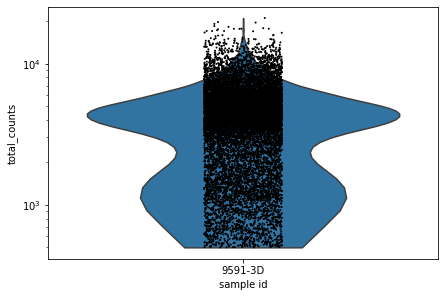

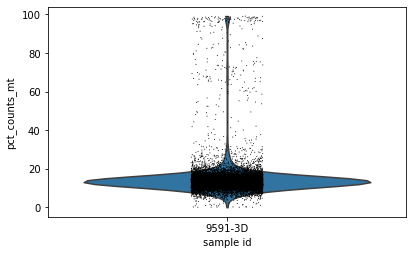

In [9]:
# Quality control - plot QC metrics
m1_t1 = sc.pl.violin(adata_m1, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m1_t2 = sc.pl.violin(adata_m1, 'pct_counts_mt', groupby='sample_id')

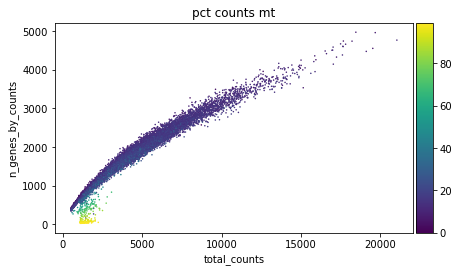

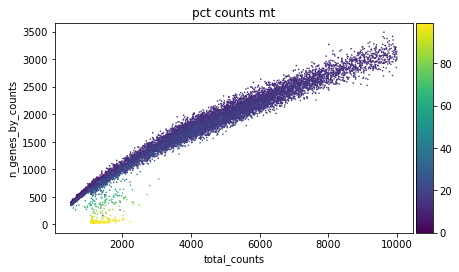

In [10]:
# Data quality summary plots
m1_p1 = sc.pl.scatter(adata_m1, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m1_p2 = sc.pl.scatter(adata_m1[adata_m1.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


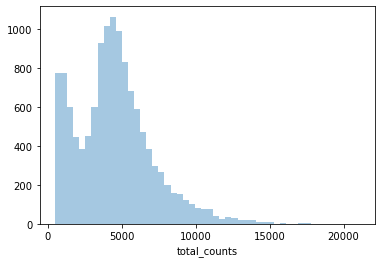

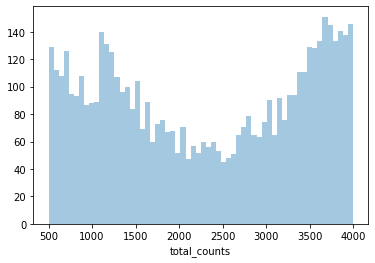

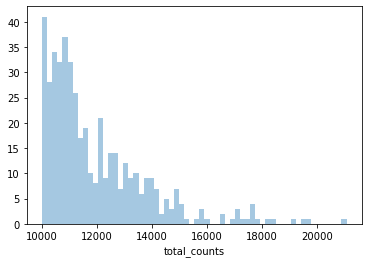

In [11]:
# Thresholding decision: counts
m1_p3 = sb.distplot(adata_m1.obs['total_counts'], kde=False)
plt.show()

m1_p4 = sb.distplot(adata_m1.obs['total_counts'][adata_m1.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m1_p5 = sb.distplot(adata_m1.obs['total_counts'][adata_m1.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

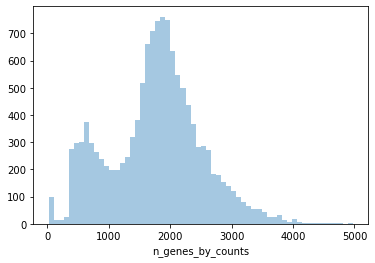

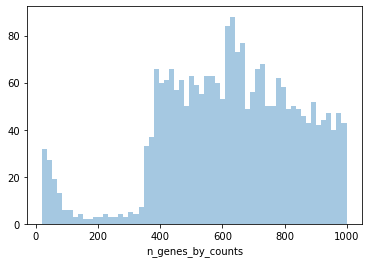

In [12]:
# Thresholding decision: genes
m1_p6 = sb.distplot(adata_m1.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m1_p7 = sb.distplot(adata_m1.obs['n_genes_by_counts'][adata_m1.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


In [13]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m1.n_obs))

sc.pp.filter_cells(adata_m1, max_counts = 18000)
print('Number of cells after max count filter: {:d}'.format(adata_m1.n_obs))

adata_m1 = adata_m1[adata_m1.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m1.n_obs))

sc.pp.filter_cells(adata_m1, min_genes = 200)
print('Number of cells after gene filter: {:d}'.format(adata_m1.n_obs))

Total number of cells: 12786
Number of cells after max count filter: 12780
Number of cells after MT filter: 12044


/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Number of cells after gene filter: 12043


In [14]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m1, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m1.n_vars))

Total number of genes: 22581
Number of genes after cell filter: 11754


### b) Sample 9591-2D

In [15]:
# Quality control - calculate QC covariates
adata_m2.var["mt"] = adata_m2.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m2, qc_vars=["mt"], inplace=True)

adata_m2.obs['log_counts'] = np.log(adata_m2.obs['total_counts'])

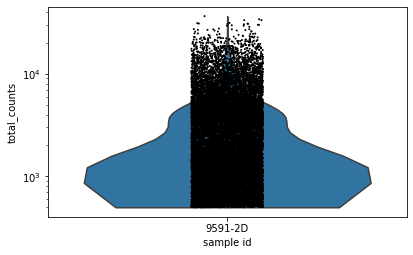

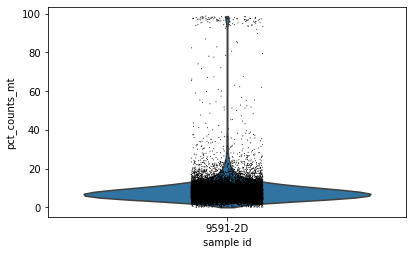

In [16]:
# Quality control - plot QC metrics
m2_t1 = sc.pl.violin(adata_m2, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m2_t2 = sc.pl.violin(adata_m2, 'pct_counts_mt', groupby='sample_id')

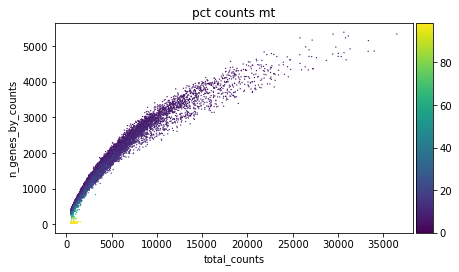

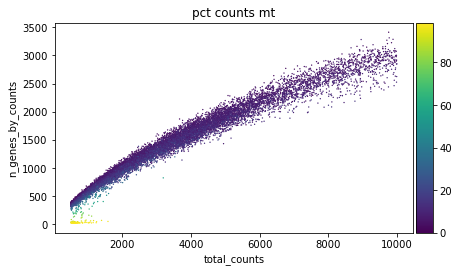

In [17]:
# Data quality summary plots
m2_p1 = sc.pl.scatter(adata_m2, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m2_p2 = sc.pl.scatter(adata_m2[adata_m2.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


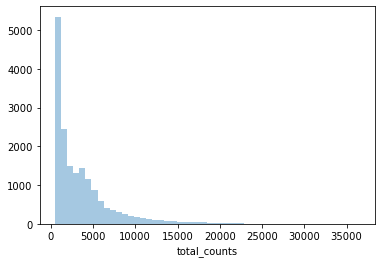

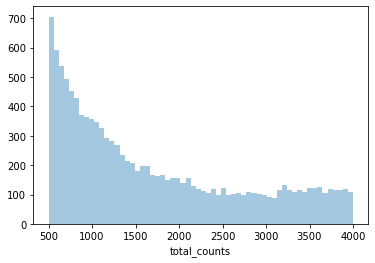

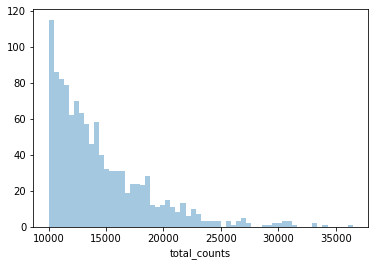

In [18]:
# Thresholding decision: counts
m2_p3 = sb.distplot(adata_m2.obs['total_counts'], kde=False)
plt.show()

m2_p4 = sb.distplot(adata_m2.obs['total_counts'][adata_m2.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m2_p5 = sb.distplot(adata_m2.obs['total_counts'][adata_m2.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

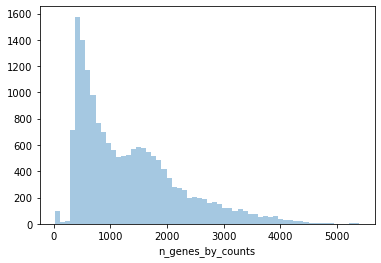

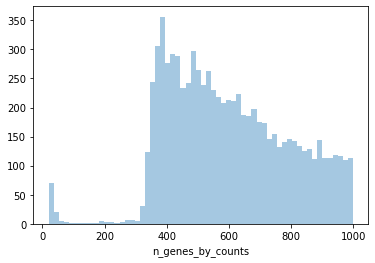

In [19]:
# Thresholding decision: genes
m2_p6 = sb.distplot(adata_m2.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m2_p7 = sb.distplot(adata_m2.obs['n_genes_by_counts'][adata_m2.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


In [20]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m2.n_obs))

# sc.pp.filter_cells(adata_m2, min_counts = 0)  # wild assumption
# print('Number of cells after min count filter: {:d}'.format(adata_m2.n_obs))

sc.pp.filter_cells(adata_m2, max_counts = 27500)
print('Number of cells after max count filter: {:d}'.format(adata_m2.n_obs))

adata_m2 = adata_m2[adata_m2.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m2.n_obs))

sc.pp.filter_cells(adata_m2, min_genes = 350)
print('Number of cells after gene filter: {:d}'.format(adata_m2.n_obs))

Total number of cells: 17412
Number of cells after max count filter: 17394
Number of cells after MT filter: 16926


/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Number of cells after gene filter: 16747


In [21]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m2, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m2.n_vars))

Total number of genes: 22581
Number of genes after cell filter: 11831


### d) Sample 16992-3D

In [22]:
# Quality control - calculate QC covariates
adata_m3.var["mt"] = adata_m3.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m3, qc_vars=["mt"], inplace=True)

adata_m3.obs['log_counts'] = np.log(adata_m3.obs['total_counts'])

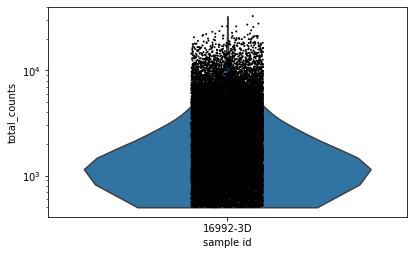

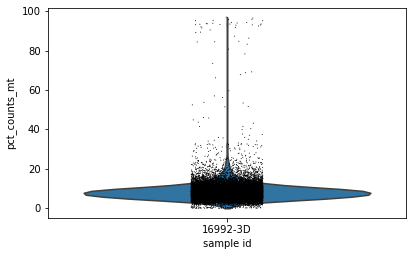

In [23]:
# Quality control - plot QC metrics
# Sample quality plots
m3_t1 = sc.pl.violin(adata_m3, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m3_t2 = sc.pl.violin(adata_m3, 'pct_counts_mt', groupby='sample_id')

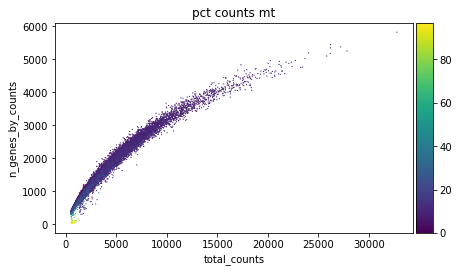

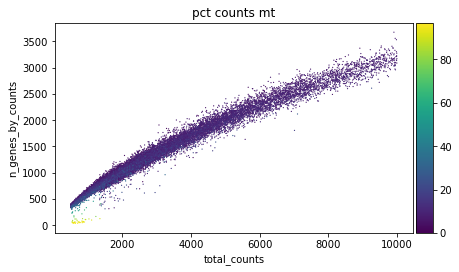

In [24]:
# Data quality summary plots
m3_p1 = sc.pl.scatter(adata_m3, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m3_p2 = sc.pl.scatter(adata_m3[adata_m3.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


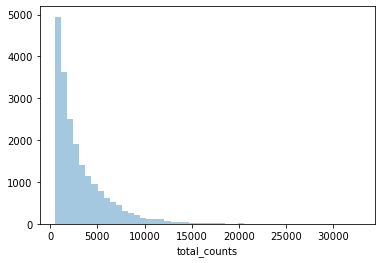

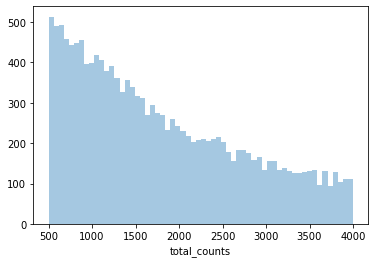

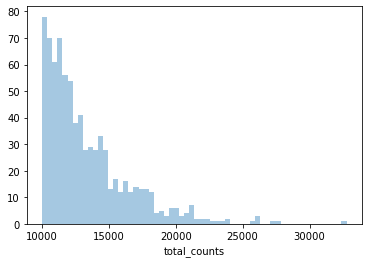

In [25]:
#Thresholding decision: counts
m3_p3 = sb.distplot(adata_m3.obs['total_counts'], kde=False)
plt.show()

m3_p4 = sb.distplot(adata_m3.obs['total_counts'][adata_m3.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m3_p5 = sb.distplot(adata_m3.obs['total_counts'][adata_m3.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

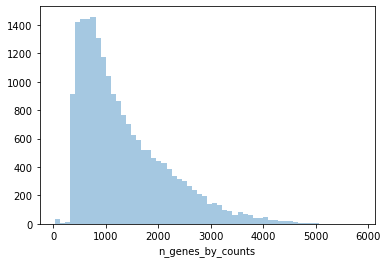

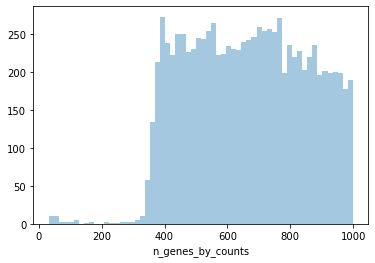

In [26]:
#Thresholding decision: genes
m3_p6 = sb.distplot(adata_m3.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m3_p7 = sb.distplot(adata_m3.obs['n_genes_by_counts'][adata_m3.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [27]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m3.n_obs))

sc.pp.filter_cells(adata_m3, max_counts = 24000)
print('Number of cells after max count filter: {:d}'.format(adata_m3.n_obs))

adata_m3 = adata_m3[adata_m3.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m3.n_obs))

sc.pp.filter_cells(adata_m3, min_genes = 350)
print('Number of cells after gene filter: {:d}'.format(adata_m3.n_obs))

Total number of cells: 20544
Number of cells after max count filter: 20536
Number of cells after MT filter: 20231


/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Number of cells after gene filter: 20190


In [28]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m3, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m3.n_vars))

Total number of genes: 22581
Number of genes after cell filter: 11884


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

### e) Sample 16992-2D

In [29]:
# Quality control - calculate QC covariates
adata_m4.var["mt"] = adata_m4.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_m4, qc_vars=["mt"], inplace=True)

adata_m4.obs['log_counts'] = np.log(adata_m4.obs['total_counts'])

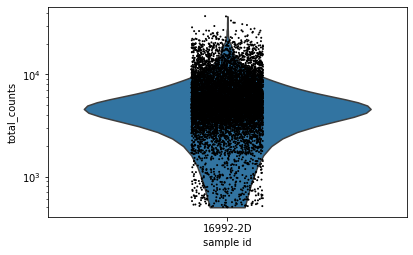

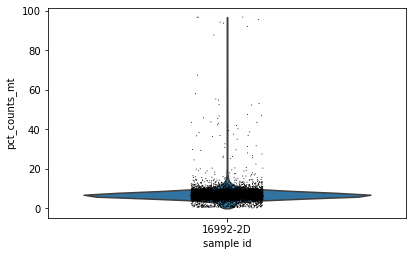

In [30]:
# Quality control - plot QC metrics
# Sample quality plots
m4_t1 = sc.pl.violin(adata_m4, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m4_t2 = sc.pl.violin(adata_m4, 'pct_counts_mt', groupby='sample_id')

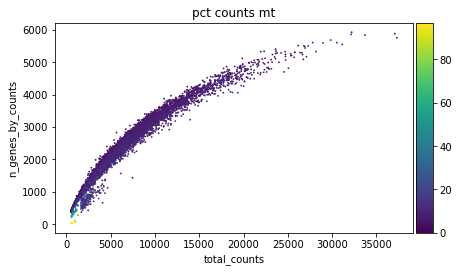

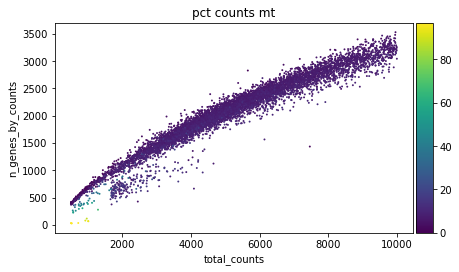

In [31]:
# Data quality summary plots
m4_p1 = sc.pl.scatter(adata_m4, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m4_p2 = sc.pl.scatter(adata_m4[adata_m4.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


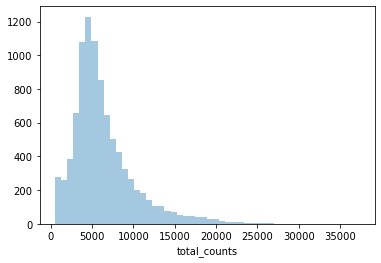

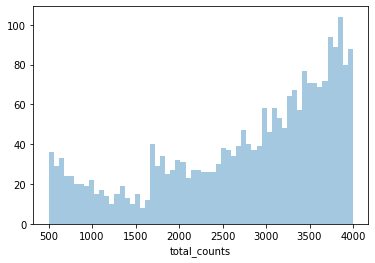

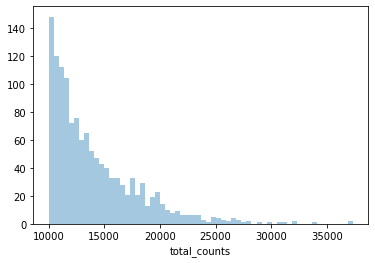

In [32]:
#Thresholding decision: counts
m4_p3 = sb.distplot(adata_m4.obs['total_counts'], kde=False)
plt.show()

m4_p4 = sb.distplot(adata_m4.obs['total_counts'][adata_m4.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

m4_p5 = sb.distplot(adata_m4.obs['total_counts'][adata_m4.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

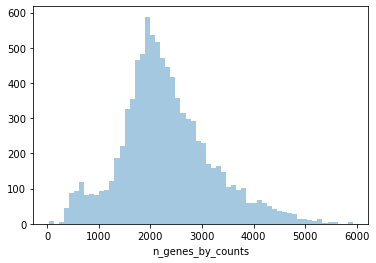

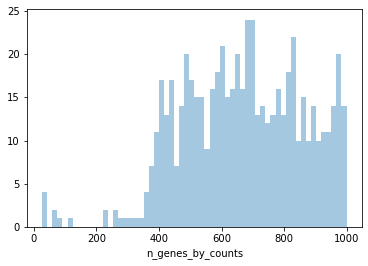

In [33]:
#Thresholding decision: genes
m4_p6 = sb.distplot(adata_m4.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

m4_p7 = sb.distplot(adata_m4.obs['n_genes_by_counts'][adata_m4.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()

In [34]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_m4.n_obs))

sc.pp.filter_cells(adata_m4, max_counts = 32500)
print('Number of cells after max count filter: {:d}'.format(adata_m4.n_obs))

adata_m4 = adata_m4[adata_m4.obs['pct_counts_mt'] < 20]
print('Number of cells after MT filter: {:d}'.format(adata_m4.n_obs))

sc.pp.filter_cells(adata_m4, min_genes = 390)
print('Number of cells after gene filter: {:d}'.format(adata_m4.n_obs))

Total number of cells: 9257
Number of cells after max count filter: 9254
Number of cells after MT filter: 9196


/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Number of cells after gene filter: 9190


In [35]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_m4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_m4, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_m4.n_vars))

Total number of genes: 22581
Number of genes after cell filter: 11754


The filtering is performed based on the thresholds we identified from the QC plots. Genes are also filtered if they are not detected in at least 20 cells. This reduces the dimensions of the matrix by removing 0 count genes and genes which are not sufficiently informative of the dataset. 

# Concatenation
Now we have (1) QC performed on concatenated samples, and (2) QC on samples to be concatenated. Let's compare them. 

In [36]:
adata2 = adata_m1.concatenate(adata_m2, batch_key='sample_nr').concatenate(adata_m3, batch_key='sample_nr').concatenate(adata_m4, batch_key='sample_nr')  # what we've done above without prior QC

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.f

### ADATA 2

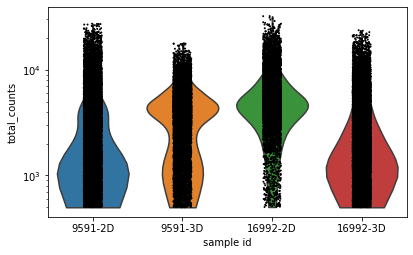

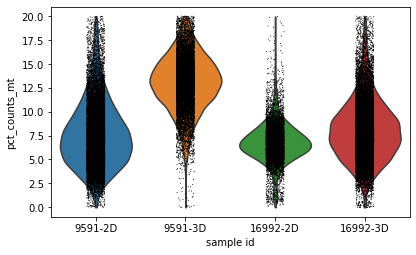

In [37]:
# Quality control - plot QC metrics
# Sample quality plots
m4_t1 = sc.pl.violin(adata2, 'total_counts', groupby='sample_id', size=2, log=True, cut=0)
m4_t2 = sc.pl.violin(adata2, 'pct_counts_mt', groupby='sample_id')

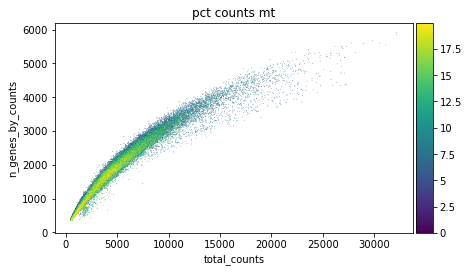

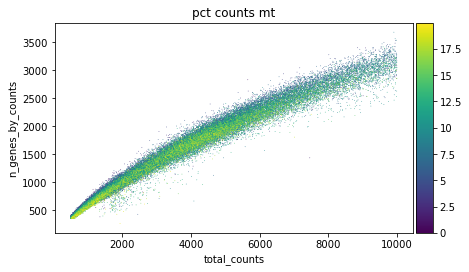

In [38]:
# Data quality summary plots
m4_p1 = sc.pl.scatter(adata2, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
m4_p2 = sc.pl.scatter(adata2[adata2.obs['total_counts']<10000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')

/home/icb/till.richter/anaconda3/envs/da_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


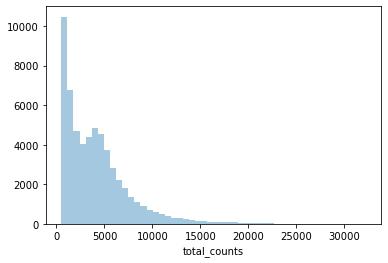

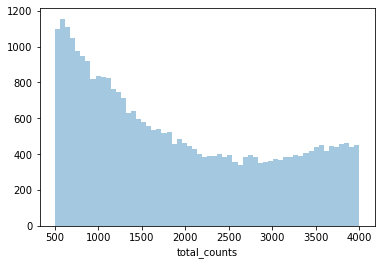

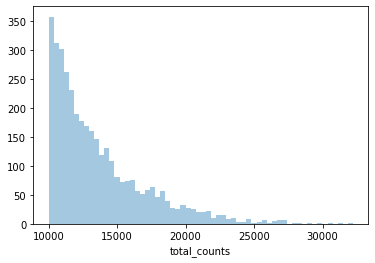

In [39]:
# Thresholding decision: counts
final_p3 = sb.distplot(adata2.obs['total_counts'], kde=False)
plt.show()

final_p4 = sb.distplot(adata2.obs['total_counts'][adata2.obs['total_counts']<4000], kde=False, bins=60)
plt.show()

final_p5 = sb.distplot(adata2.obs['total_counts'][adata2.obs['total_counts']>10000], kde=False, bins=60)
plt.show()

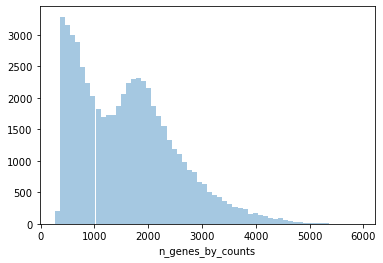

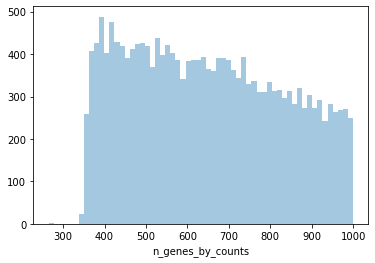

In [40]:
# Thresholding decision: genes
final_p6 = sb.distplot(adata2.obs['n_genes_by_counts'], kde=False, bins=60)
plt.show()

final_p6 = sb.distplot(adata2.obs['n_genes_by_counts'][adata2.obs['n_genes_by_counts']<1000], kde=False, bins=60)
plt.show()


### RESULT QC
Since adata2 looks much better, we store it for the next steps

In [41]:
adata2.write_h5ad('../data/adata/QC_adata.h5ad')